In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd
import numpy as np
from scipy import stats


In [2]:
burrows = pd.read_csv("zip_borough.csv")
burrowszip = burrows.rename(columns={"zip":"Zipcode"})

In [3]:

evictions_data = pd.read_csv("Evictions_clean_2.csv")
evictions_data.head()
evictions_data1 = evictions_data.rename(columns={'EVICTION_ZIP':"Zipcode"})
zip_eviction = evictions_data1.groupby('Zipcode').count()['EXECUTED_DATE']
zip_eviction.head()

Zipcode
10001    300
10002    253
10003    125
10004     17
10005     41
Name: EXECUTED_DATE, dtype: int64

In [4]:
crime_data = pd.read_csv("Finalcrime.csv")
crime_data.head()
zip_crime = crime_data.groupby('Zipcode').count()['ARREST_DATE']
zip_crime.to_frame().head()

,ARREST_DATE
Zipcode,
10001.0,11
10002.0,10
10003.0,7
10004.0,1
10007.0,3


In [5]:

parks_data = pd.read_csv('Parks.csv')

parks1 = parks_data.rename(columns={'ZIPCODE':"Zipcode"})


zip_park = parks1.groupby('Zipcode').sum()['ACRES']
zip_park.to_frame().head()

,ACRES
Zipcode,
10001,3.337037
10002,50.239190
10004,25.518875
10007,14.032170
10011,14.149388


In [6]:

subway_data = pd.read_csv("Subway.csv")
subway_data
subway_data.head()
zip_subway = subway_data.groupby('Zipcode').count()['Line']
zip_subway.to_frame().head()


,Line
Zipcode,
10001.0,59
10002.0,28
10003.0,49
10004.0,34
10005.0,18


In [7]:
crime_subwaymerge = pd.merge(zip_crime, zip_subway, how="outer", on='Zipcode')
crime_subwaymerge.head()

Park_Crime_Subway = pd.merge(crime_subwaymerge, zip_park, how="outer", on='Zipcode')
Park_Crime_Subway.head()

totalmerge1 = pd.merge(Park_Crime_Subway, zip_eviction, how="outer", on="Zipcode")
totalmerge1['ARREST_DATE'] = totalmerge1['ARREST_DATE'].apply(pd.to_numeric)
totalmerge1.dropna().head()


,ARREST_DATE,Line,ACRES,EXECUTED_DATE
Zipcode,,,,
10001.0,11.0,59.0,3.337037,300.0
10002.0,10.0,28.0,50.239190,253.0
10004.0,1.0,34.0,25.518875,17.0
10007.0,3.0,56.0,14.032170,19.0
10011.0,4.0,94.0,14.149388,154.0


In [8]:
totalmerge = pd.merge(totalmerge1, burrowszip, how='outer', on='Zipcode')
totalmerge.dropna().head()

,Zipcode,ARREST_DATE,Line,ACRES,EXECUTED_DATE,borough
0,10001.0,11.0,59.0,3.337037,300.0,Manhattan
1,10002.0,10.0,28.0,50.239190,253.0,Manhattan
3,10004.0,1.0,34.0,25.518875,17.0,Manhattan
4,10007.0,3.0,56.0,14.032170,19.0,Manhattan
7,10011.0,4.0,94.0,14.149388,154.0,Manhattan


In [9]:

# parkseviction = plt.scatter(zip_subway, zip_park, marker='o', facecolor='coral', edgecolor='black', s=zip_crime, alpha=.75)
# zip_park.plot.scatter(x, y, s=None, c=None)

# ax1 = totalmerge.plot.scatter(x="EXECUTED_DATE", y='Line', marker='o', facecolor='coral', s="ARREST_DATE", edgecolor='black', alpha=.75)

# plt.xlabel("Evictions")
# plt.ylabel("Subway Enterances")
# plt.title("Number of Evictions and Subway Entrances in a Zipcode")

# labels = totalmerge.groupby(['borough']).astype('category')

# plt.scatter(x, y, c=labels, cmap=matplotlib.colors.ListedColormap(colors))

color = [{"Manhattan":'red',
          "Bronx":'green',
          "Staten":'blue',
          "Queens":'purple',
          "Brooklyn":'yellow'}]



In [10]:
totalmerge.head()
eviction = totalmerge.groupby(["borough","Zipcode"]).mean()['EXECUTED_DATE']
subway = totalmerge.groupby(["borough", "Zipcode"]).mean()['Line']
park = totalmerge.groupby(["borough", "Zipcode"]).mean()["ACRES"]
crime = totalmerge.groupby(["borough", "Zipcode"]).mean()['ARREST_DATE']

Text(0.5, 1.0, 'Expected: There are Fewer Evictions Where More Subway Access Exists')

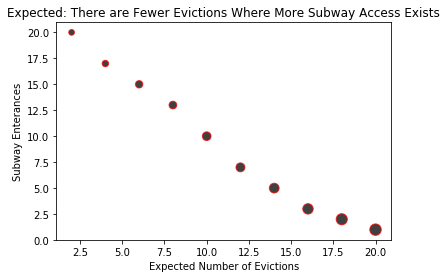

In [11]:
ex_eviction = (2,4,6,8,10,12,14,16,18,20)
ex_sub = (20,17,15,13,10,7,5,3,2,1)
ex_crime = (33,42,55,60,76,80,96,109,125,132)
ex_graphic = plt.scatter(ex_eviction,ex_sub,marker = 'o', facecolor = 'black', s=ex_crime, edgecolor='red', alpha = .75)
plt.xlabel("Expected Number of Evictions")
plt.ylabel("Subway Enterances")
plt.title("Expected: There are Fewer Evictions Where More Subway Access Exists")


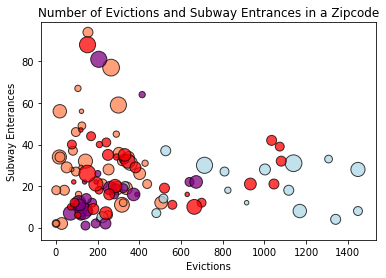

In [12]:
manhattan_subway = plt.scatter(eviction['Manhattan'], subway['Manhattan'], marker='o', 
            facecolor='coral', s=crime*20,
            edgecolor='black', alpha=.75)
Bronx_subway = plt.scatter(eviction['Bronx'], subway['Bronx'], marker='o', 
            facecolor='lightblue', s=crime*20,
            edgecolor='black', alpha=.75)
Staten_subway = plt.scatter(eviction['Staten'], subway['Staten'], marker='o', 
            facecolor='green', s=crime*20,
            edgecolor='black', alpha=.75)
Queens_subway = plt.scatter(eviction['Queens'], subway['Queens'], marker='o', 
            facecolor='purple', s=crime*20,
            edgecolor='black', alpha=.75)
Brooklyn_subway = plt.scatter(eviction['Brooklyn'], subway['Brooklyn'], marker='o', 
            facecolor='red', s=crime*20,
            edgecolor='black', alpha=.75)

plt.xlabel("Evictions")
plt.ylabel("Subway Enterances")
plt.title("Number of Evictions and Subway Entrances in a Zipcode")

plt.show()

Text(0.5, 1.0, 'Expected Relationship of Crimes to Evictions')

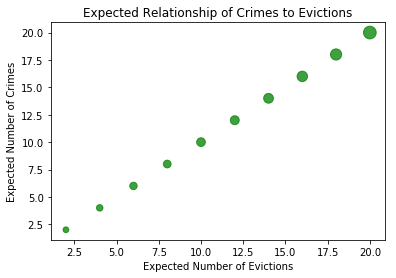

In [14]:
ex_eviction = (2,4,6,8,10,12,14,16,18,20)
ex_parks = (2,4,6,8,10,12,14,16,18,20)
ex_crime = (33,42,55,60,76,80,96,109,125,162)
ex_graphic = plt.scatter(ex_eviction,ex_parks,marker = 'o', facecolor = 'green', s=ex_crime, edgecolor='green', alpha = .75)
plt.xlabel("Expected Number of Evictions")
plt.ylabel("Expected Number of Crimes")
plt.title("Expected Relationship of Crimes to Evictions")

Text(0.5, 1.0, 'Expected: There are Fewer Evictions Where Greater Park Space is Nearby')

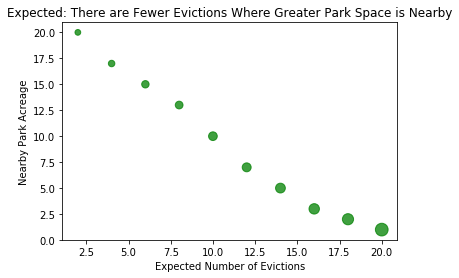

In [21]:
ex_eviction = (2,4,6,8,10,12,14,16,18,20)
ex_parks = (20,17,15,13,10,7,5,3,2,1)
ex_crime = (33,42,55,60,76,80,96,109,125,162)
ex_graphic = plt.scatter(ex_eviction,ex_parks,marker = 'o', facecolor = 'green', s=ex_crime, edgecolor='green', alpha = .75)
plt.xlabel("Expected Number of Evictions")
plt.ylabel("Nearby Park Acreage")
plt.title("Expected: There are Fewer Evictions Where Greater Park Space is Nearby")

Text(0.5, 1.0, 'Number of Evictions and Acres of Parks in a Zipcode')

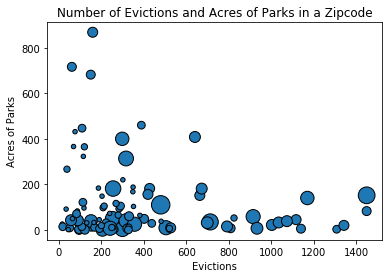

In [16]:
plt.scatter(x=totalmerge["EXECUTED_DATE"], y=totalmerge['ACRES'], marker='o', cmap='coral', s=totalmerge["ARREST_DATE"]*20, edgecolor='black')


plt.xlabel("Evictions")
plt.ylabel("Acres of Parks")
plt.title("Number of Evictions and Acres of Parks in a Zipcode")

Text(0.5, 1.0, 'Number of Evictions and Acres of Parks in a Zipcode')

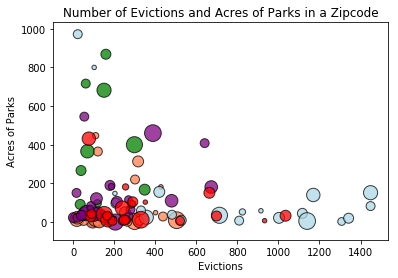

In [17]:
manhattan_parks = plt.scatter(eviction['Manhattan'], park['Manhattan'], marker='o', 
            facecolor='coral', s=crime*20,
            edgecolor='black', alpha=.75)
Bronx_parks = plt.scatter(eviction['Bronx'], park['Bronx'], marker='o', 
            facecolor='lightblue', s=crime*20,
            edgecolor='black', alpha=.75)
Staten_parks = plt.scatter(eviction['Staten'], park['Staten'], marker='o', 
            facecolor='green', s=crime*20,
            edgecolor='black', alpha=.75)
Queens_parks = plt.scatter(eviction['Queens'], park['Queens'], marker='o', 
            facecolor='purple', s=crime*20,
            edgecolor='black', alpha=.75)
Brooklyn_parks = plt.scatter(eviction['Brooklyn'], park['Brooklyn'], marker='o', 
            facecolor='red', s=crime*20,
            edgecolor='black', alpha=.75)



plt.xlabel("Evictions")
plt.ylabel("Acres of Parks")
plt.title("Number of Evictions and Acres of Parks in a Zipcode")


Text(0.5, 1.0, 'Number of Evictions and Acres of Parks in a Zipcode')

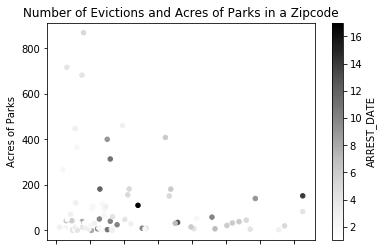

In [18]:
ax2 = totalmerge.plot.scatter(x="EXECUTED_DATE", y='ACRES', c='ARREST_DATE')
plt.xlabel("Evictions")
plt.ylabel("Acres of Parks")
plt.title("Number of Evictions and Acres of Parks in a Zipcode")

In [ ]:
plt.plot(eviction['Manhattan'], crime['Manhattan'], linewidth=0, marker="o", color="coral")
vc_std_err = stats.linregress(eviction['Manhattan'], park['Manhattan'])

In [ ]:
plt.plot(eviction['Bronx'], crime['Bronx'], linewidth=0, marker="o", color="lightblue")

In [ ]:
plt.plot(eviction['Brooklyn'], crime['Brooklyn'], linewidth=0, marker="o", color="red")

In [ ]:
plt.plot(eviction['Staten'], crime['Staten'], linewidth=0, marker="o", color="green")

In [ ]:
plt.plot(eviction['Queens'], crime['Queens'], linewidth=0, marker="o", color="purple")